In [ ]:
#2024년 11월 30일
#commit 한 사람 :강건희
#주 선호 발에 따른 선수의 능력치가 같은지 다른지
#데이터 확인, 데이터 plot 확인, t-tset를 위해 데이터가 정규성을 가지는지, 분산이 같은지 확인 , t-test로 결론 도출 코드 작성
#개선해야할 부분: 샘플 갯수가 커서 정규성을 제대로 파악하기 어려움 (ex 샤피로 검정) 따라서 두 그룹이 정말 정규분포를 따르는지 근거가 좀 더 필요

# 24년 12월 1일
# commit 한 사람: 오주영
# left_footed_values, right_footed_values 두 변수에 대한 선언이 누락돼있어서 변수 생성.
# 샤피로 검정부분 코드 수정 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv("FIFA_train.csv")
df_test = pd.read_csv("FIFA_test.csv")

# 데이터 합치기
df = pd.concat([df_train, df_test], ignore_index=True)

In [3]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
#plt그리기 위해 나눠 봤습니다
left_foot = df[df["prefer_foot"] == "left"]
right_foot = df[df["prefer_foot"] == "right"]

In [5]:
#전체 행 갯수는
total_rows = print(len(df)) # 전체
left_foot_rows = print(len(left_foot))  #왼발 그룹!
right_foot_rows = print(len(right_foot))  #오른발 그룹!

12760
3008
9752


In [6]:
# 1. 데이터 요약--------------------------------------------------------------

In [7]:
print("데이터 요약 정보:")
print(df.info())

print("\n기술 통계 (수치형 변수):")
print(df.describe())

데이터 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12760 non-null  int64  
 1   name              12760 non-null  object 
 2   age               12760 non-null  int64  
 3   continent         12760 non-null  object 
 4   contract_until    12760 non-null  object 
 5   position          12760 non-null  object 
 6   prefer_foot       12760 non-null  object 
 7   reputation        12760 non-null  float64
 8   stat_overall      12760 non-null  int64  
 9   stat_potential    12760 non-null  int64  
 10  stat_skill_moves  12760 non-null  float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.2+ MB
None

기술 통계 (수치형 변수):
                 id           age    reputation  stat_overall  stat_potential  \
count  12760.000000  12760.000000  12760.000000  12760.00

In [8]:
#2결측치 확인-----------------------------------------------------------------------

In [9]:
print("\n결측치 확인:")
missing_data = df.isnull().sum()
print(missing_data)


결측치 확인:
id                     0
name                   0
age                    0
continent              0
contract_until         0
position               0
prefer_foot            0
reputation             0
stat_overall           0
stat_potential         0
stat_skill_moves       0
value               3828
dtype: int64


In [10]:
#3두 그룹 boxplot-------------------------------------------------------------------

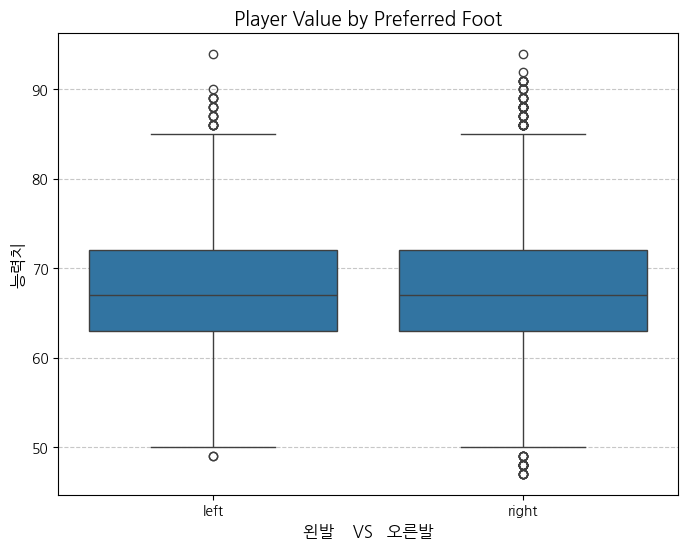

In [11]:
plt.figure(figsize=(8, 6))
plt.rc('font', family='NanumGothic')
sns.boxplot(data=df, x="prefer_foot", y="stat_overall")
plt.title("Player Value by Preferred Foot", fontsize=14)
plt.xlabel("왼발    VS   오른발", fontsize=12)
plt.ylabel("능력치", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [12]:
#아웃라이어를 제거 하지않은이유 - 데이터를 보니 능력치에 범위는 0 ~ 100 이다. 우리가 ranksum test를 쓰는 경우는 보통 아웃라이어가 
# 정상적으로 높은 값을 가지고 있어 평균이 망가지는 경우 때문에 사용하는데 0~100으로 제한되어있기때문에 제거 하지 않아도 된다고 판단했다.

In [13]:
#4 히스토그램----------------------------------------------------------------------

In [14]:
#----------------------------------------------------------------------------------

<Axes: xlabel='stat_overall', ylabel='Count'>

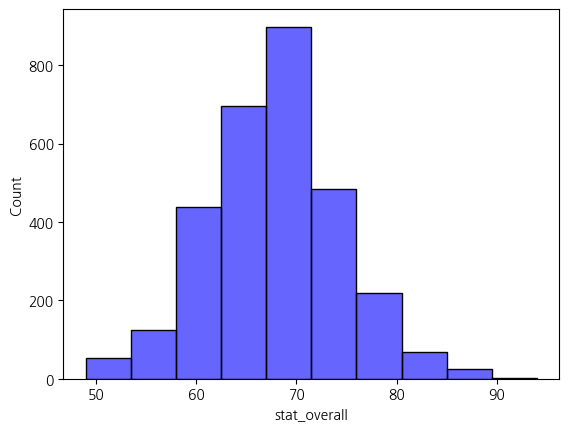

In [15]:
# 왼발 그룹 히스토그램
left_footed_values = left_foot['stat_overall']
sns.histplot(left_footed_values, bins=10, color="blue", label="Left Foot", alpha=0.6)

<Axes: xlabel='stat_overall', ylabel='Count'>

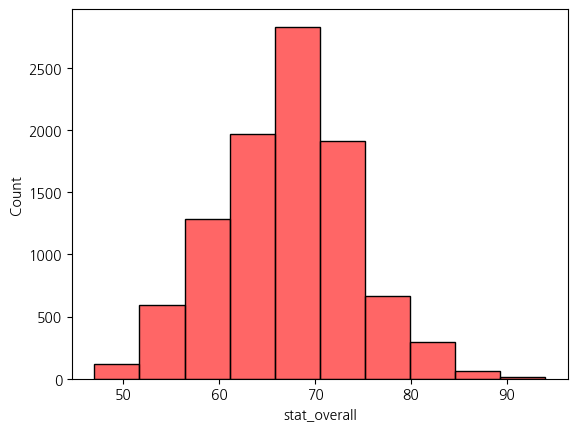

In [16]:
# 오른발 그룹 히스토그램
right_footed_values = right_foot['stat_overall']
sns.histplot(right_footed_values, bins=10, color="red", label="Right Foot", alpha=0.6)


In [17]:
#히스토그램은 보아 두 그룹이 정규분포를 따르고 있다고 생각 (여기는 그림을 통한 추측입니다.)

In [18]:
#5 shapiro 와 kstest를 통한 두 그룹의 정규성 확인------------------------------------

In [19]:
#----------------------------------------------------------------------------------

In [20]:
right_footed_values.mean()

67.01999589827727

In [21]:
right_footed_values.std()

6.966576377381455

In [22]:
#오른발 그룹 정규성 검증
from scipy.stats import shapiro, kstest, norm
import numpy as np
import statistics

print(shapiro(right_footed_values))
print(kstest(right_footed_values, "norm", args=(statistics.mean(right_footed_values), statistics.stdev(right_footed_values))
))


ShapiroResult(statistic=0.9966505169868469, pvalue=4.002372977311708e-14)
KstestResult(statistic=0.03657052612674594, pvalue=9.096585463728199e-12, statistic_location=63, statistic_sign=-1)


c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# 두 테스트의 p-value가 낮게 나온 이유는 sample의 갯수가 수 천개이기 때문이다. 
#샘플 크기가 클 때는 일반적인 정규성 검정(Shapiro-Wilk, Kolmogorov-Smirnov, Jarque-Bera 등)이 작은 편차를 유의미하게 검출하여 귀무가설을 기각할 가능성이 커지기 때문에, 
#샘플 크기의 영향을 덜 받는 방법을 고려해야한다

In [24]:
#왼발 그룹 정규성 검증
print(left_footed_values)
print(shapiro(left_footed_values))
print(kstest(left_footed_values, "norm", args=(statistics.mean(left_footed_values), statistics.stdev(left_footed_values))
))

0        94
6        90
9        89
13       89
14       88
         ..
12736    51
12740    51
12744    50
12745    50
12750    50
Name: stat_overall, Length: 3008, dtype: int64
ShapiroResult(statistic=0.9950530529022217, pvalue=1.6813226366707568e-08)
KstestResult(statistic=0.046229234384289164, pvalue=5.030952621758954e-06, statistic_location=69, statistic_sign=1)


In [25]:
from scipy.stats import jarque_bera

# Jarque-Bera Test
print(jarque_bera(right_footed_values))


SignificanceResult(statistic=5.2220067451701055, pvalue=0.07346079822110539)


In [26]:
from scipy.stats import jarque_bera

# Jarque-Bera Test
print(jarque_bera(left_footed_values))


SignificanceResult(statistic=21.407064926009095, pvalue=2.2465439249804965e-05)


In [27]:
from scipy.stats import anderson
result = anderson(left_footed_values, dist="norm")
print("Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

# 결과 해석
for sl, cv in zip(result.significance_level, result.critical_values):
    print(f"Significance Level {sl}%: Critical Value {cv}")
if result.statistic > result.critical_values[2]:  # 보통 5% 유의 수준 사용
    print("데이터가 정규분포를 따르지 않습니다.")
else:
    print("데이터가 정규분포를 따릅니다.")

Statistic: 4.700853917428049
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Significance Level 15.0%: Critical Value 0.575
Significance Level 10.0%: Critical Value 0.655
Significance Level 5.0%: Critical Value 0.786
Significance Level 2.5%: Critical Value 0.917
Significance Level 1.0%: Critical Value 1.091
데이터가 정규분포를 따르지 않습니다.


In [28]:
#6 qqplot------------------------------------------------------------------------

In [29]:
#----------------------------------------------------------------------------------

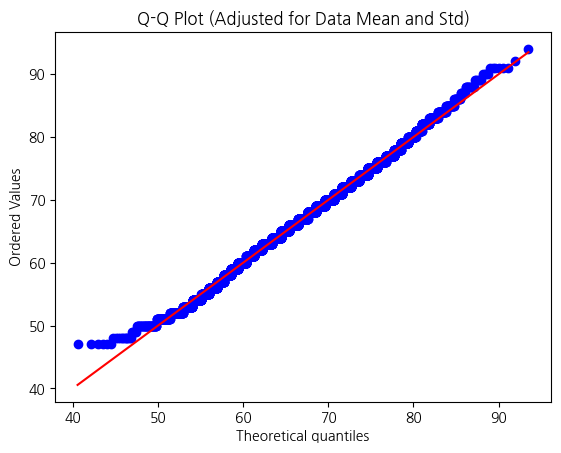

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 데이터의 평균과 표준편차 계산
mean = np.mean(right_footed_values)
std = np.std(right_footed_values)

# Q-Q Plot 생성
stats.probplot(right_footed_values, dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()


c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


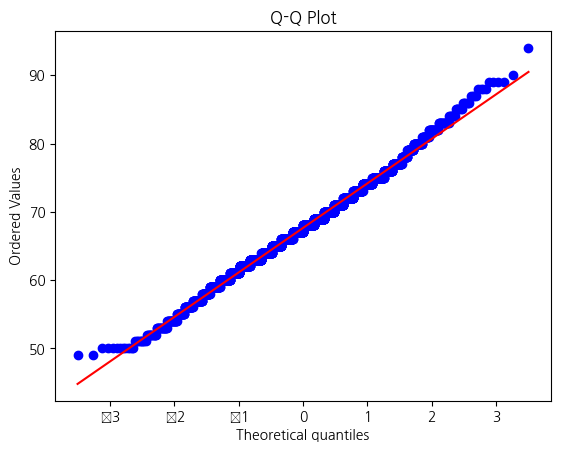

In [31]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(left_footed_values, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [32]:
#qqplot을 보아 정규 분포를 따른다고 생각

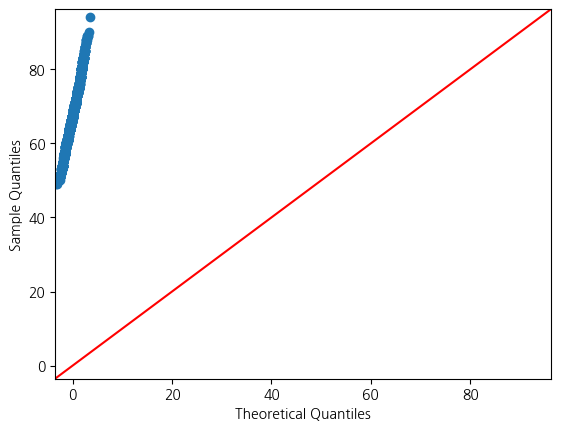

In [33]:
#왼발그룹 qqplot
import statsmodels.api as sm
sm.qqplot(left_footed_values, line='45')
plt.show()

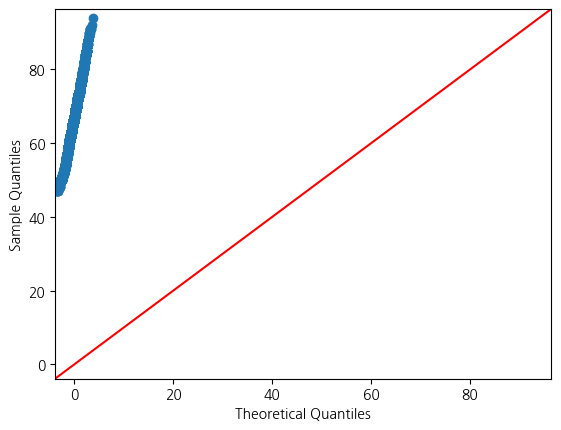

In [34]:
##오른발그룹 qqplot
import statsmodels.api as sm
sm.qqplot(right_footed_values, line='45')
plt.show()

In [35]:
#위 qqplot은 분위수에 대한 plot이기때문에 무시한다고 판단

In [36]:
from scipy.stats import kurtosis, skew
#ㅊjaeh
kurt = kurtosis(left_footed_values)
print(f"첨도(Kurtosis): {kurt:.4f}")

# 왜도
skewness = skew(left_footed_values)
print(f"왜도(Skewness): {skewness:.4f}")

첨도(Kurtosis): 0.2917
왜도(Skewness): 0.1464


In [37]:
from scipy.stats import kurtosis, skew
#첨도
kurt = kurtosis(right_footed_values)
print(f"첨도(Kurtosis): {kurt:.4f}")

# 왜도
skewness = skew(right_footed_values)
print(f"왜도(Skewness): {skewness:.4f}")

첨도(Kurtosis): 0.0678
왜도(Skewness): 0.0454


In [38]:
# 두 그룹의 왜도 및 첨도가 0에 가까우므로 정규분포를 따른다고 생각

In [39]:
#분산이 같은지 검정-------------------------------------------------------

In [40]:
#------------------------------------------------------------------

In [41]:
from scipy.stats import bartlett
print(bartlett(left_footed_values, right_footed_values))

BartlettResult(statistic=18.451384048850315, pvalue=1.742942021465624e-05)


In [42]:
from scipy.stats import levene
print(levene(left_footed_values, right_footed_values))

LeveneResult(statistic=17.62530495241372, pvalue=2.7080947107176833e-05)


In [43]:
from scipy.stats import fligner
print(fligner(left_footed_values, right_footed_values))

FlignerResult(statistic=17.33479956763485, pvalue=3.1339492410573334e-05)


In [44]:
#두 그룹의 분산은 다르다고 판단

In [45]:
#t-test-------------------------------------------------------

In [46]:
import scipy.stats as stats


print(stats.ttest_ind(left_footed_values, right_footed_values,equal_var=False, alternative='greater'))

Ttest_indResult(statistic=4.439254185771714, pvalue=4.605442019210169e-06)


In [47]:
#결론 왼발선수들이 능력치가 크다는 귀무기설을 기각한다- 왼발 선수 능력치가 작다

In [48]:
print(stats.ttest_ind(left_footed_values, right_footed_values,equal_var=False, alternative='less'))

Ttest_indResult(statistic=4.439254185771714, pvalue=0.9999953945579808)


In [49]:
#결론 왼발선수들이 능력치가 작다는 귀무가설을 기각할 수 없다 - 왼발 선수 능력치가 작지않다. 